In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.utils import to_categorical
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn import utils
from PIL import Image
from keras import backend as K
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten, BatchNormalization
from keras.losses import SparseCategoricalCrossentropy
from sklearn.metrics import f1_score
from keras.utils.vis_utils import plot_model
from keras import backend as K
from google.colab import drive
import os, sys

drive.mount('/content/drive')
folder_path = '/content/drive/MyDrive/lab6'
%cd /content/drive/MyDrive/lab6/

def resize_image(src_img, size, bg_color): 
    src_img.thumbnail(size, Image.ANTIALIAS) 
    new_image = Image.new("RGB", size, bg_color)
    new_image.paste(src_img, (int((size[0] - src_img.size[0]) / 2), int((size[1] - src_img.size[1]) / 2)))
    return new_image

def crop_center(pil_img, crop_width, crop_height):
    img_width, img_height = pil_img.size
    return pil_img.crop(((img_width - crop_width) // 2,
                         (img_height - crop_height) // 2,
                         (img_width + crop_width) // 2,
                         (img_height + crop_height) // 2))

def crop_max_square(pil_img):
    return crop_center(pil_img, min(pil_img.size), min(pil_img.size))

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/lab6


In [ ]:
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

train_images = train_images / 255.0
test_images = test_images / 255.0

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

model = Sequential()
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
%%time

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=3, batch_size=128)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

Epoch 1/3
469/469 [==============================] - 3s 6ms/step - loss: 0.3051 - accuracy: 0.9157
Epoch 2/3
469/469 [==============================] - 3s 7ms/step - loss: 0.1320 - accuracy: 0.9617
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 0.0871 - accuracy: 0.9733
test_acc: 0.9732999801635742
CPU times: user 13.9 s, sys: 1.01 s, total: 14.9 s
Wall time: 12 s


In [ ]:
%%time

model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=3, batch_size=128)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

Epoch 1/3
469/469 [==============================] - 3s 5ms/step - loss: 0.0623 - accuracy: 0.9834
Epoch 2/3
469/469 [==============================] - 2s 5ms/step - loss: 0.0590 - accuracy: 0.9842
Epoch 3/3
313/313 [==============================] - 1s 3ms/step - loss: 0.0777 - accuracy: 0.9763
test_acc: 0.9763000011444092
CPU times: user 11.2 s, sys: 760 ms, total: 12 s
Wall time: 9.51 s


In [ ]:
%%time

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=3, batch_size=128)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

Epoch 1/3
469/469 [==============================] - 4s 6ms/step - loss: 0.0659 - accuracy: 0.9803
Epoch 2/3
469/469 [==============================] - 3s 6ms/step - loss: 0.0515 - accuracy: 0.9844
Epoch 3/3
313/313 [==============================] - 1s 4ms/step - loss: 0.0734 - accuracy: 0.9771
test_acc: 0.9771000146865845
CPU times: user 13.3 s, sys: 1.07 s, total: 14.3 s
Wall time: 13 s


In [ ]:
%%time

model.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_images, train_labels, epochs=3, batch_size=128)
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('test_acc:', test_acc)

Epoch 1/3
469/469 [==============================] - 27s 10ms/step - loss: 0.0350 - accuracy: 0.9897
Epoch 2/3
469/469 [==============================] - 3s 7ms/step - loss: 0.0336 - accuracy: 0.9904
Epoch 3/3
313/313 [==============================] - 1s 2ms/step - loss: 0.0693 - accuracy: 0.9791
test_acc: 0.9790999889373779
CPU times: user 16.3 s, sys: 1.38 s, total: 17.6 s
Wall time: 35.1 s


In [ ]:
X, y = [], []
size = (28,28)
background_color="white"
test_image_files = os.listdir(folder_path) 

for file_idx in range(len(test_image_files)):
    img = Image.open(os.path.join(folder_path, test_image_files[file_idx])).convert('RGB')
    resized_img = np.array(resize_image(img, size, background_color)) 
    cropped_img = np.array(crop_max_square(img).resize((size[0], size[1]), Image.LANCZOS)) 
    X.append(cropped_img) 
    y.append(test_image_files[file_idx][0]) 

X = np.asarray(X)
y = np.reshape(np.asarray(y), (len(y), 1))
y = y.astype('float64') - np.ones((len(y), 1))
y = y.astype('<U1')
print('X shape:', X.shape, '\ny shape:', y.shape)

X shape: (1489, 28, 28, 3) 
y shape: (1489, 1)


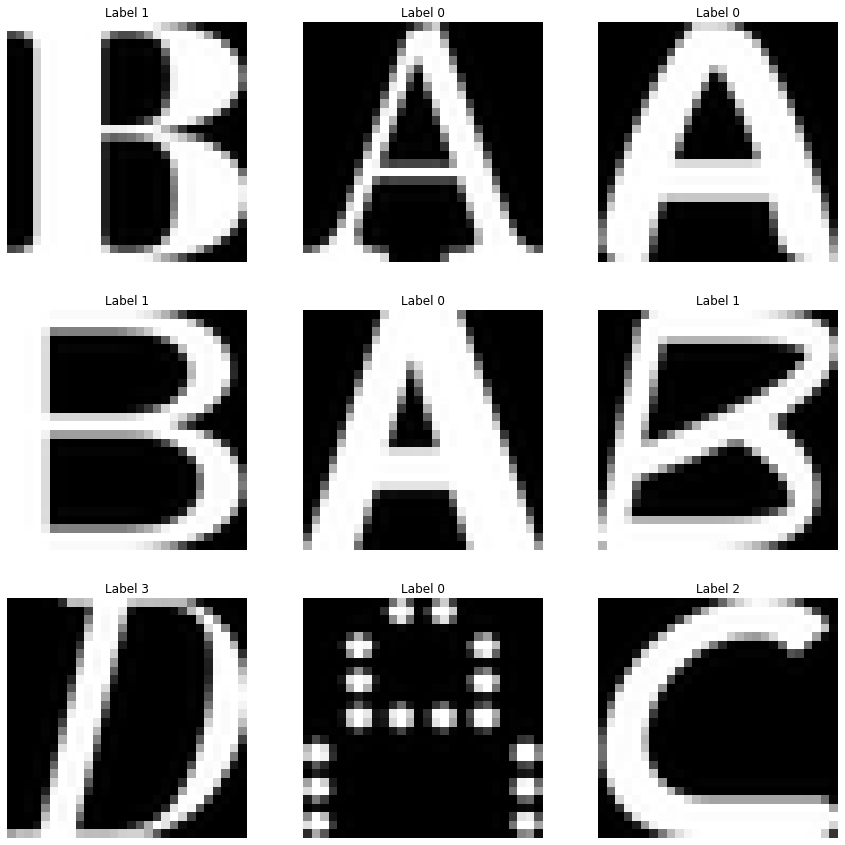

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=5)

ax = []
fig = plt.figure(figsize=(15,15))

for i in range(9):
    ax.append(fig.add_subplot(3, 3, i+1)) 
    plt.imshow(X_train[i])
    plt.title(str('Label ' + y_train[i][0]))
    plt.axis('off')

In [ ]:
print('X_train shape:', X_train.shape, '\ny_train shape:', y_train.shape, 
      '\nX_test shape:', X_test.shape, '\ny_test shape:', y_test.shape)

X_train, X_test = X_train / 255.0, X_test / 255.0

y_train = y_train.astype('float32').reshape((-1,1))
y_test = y_test.astype('float32').reshape((-1,1))

X_train shape: (1191, 28, 28, 3) 
y_train shape: (1191, 1) 
X_test shape: (298, 28, 28, 3) 
y_test shape: (298, 1)


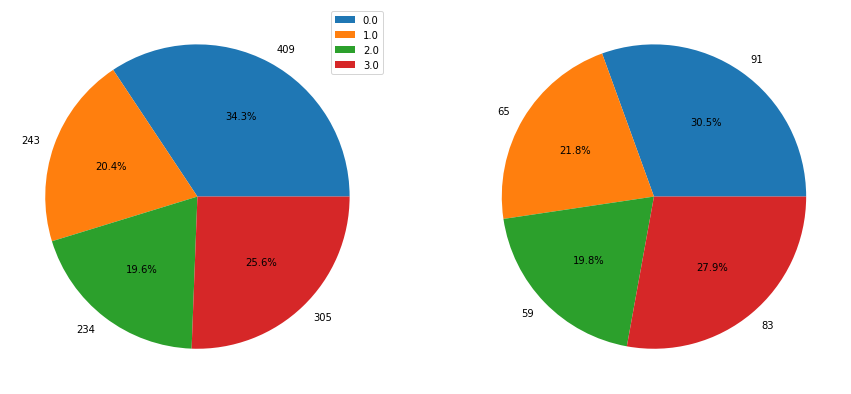

In [ ]:
train_counts = np.unique(y_train, return_counts=True)
test_counts = np.unique(y_test, return_counts=True)

fig = plt.figure(figsize=(15, 10))
ax1 = fig.add_subplot(121)
ax1.pie(train_counts[1], labels=train_counts[1], autopct='%1.1f%%')
ax2 = fig.add_subplot(122)
ax2.pie(test_counts[1], labels=test_counts[1], autopct='%1.1f%%')
ax1.legend(train_counts[0])
plt.show()

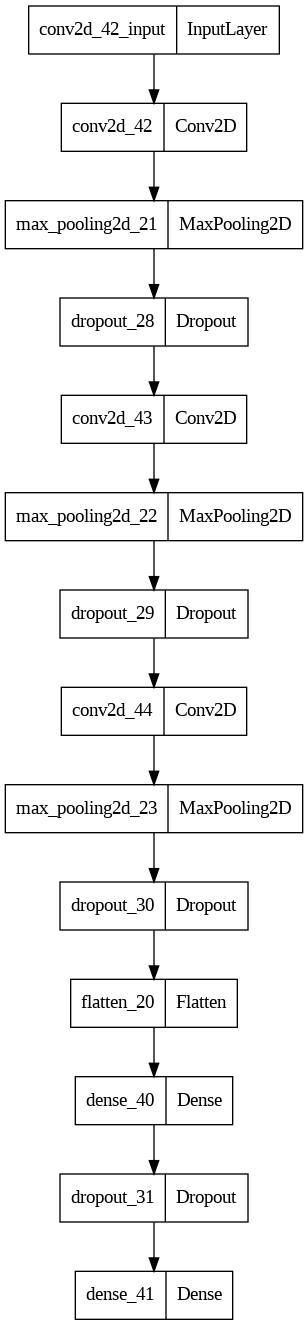

In [ ]:
loss = 'sparse_categorical_crossentropy'
optimizer = 'Adam'
metrics = ['accuracy']
epochs = 5
batch_size = 32

class ImageClassifier:
    def __init__(self):
        self.model = Sequential()

    def train(self, X_train, y_train, X_val, y_val, epochs, batch_size):
        hist = self.model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=batch_size)
        return hist

    def evaluate(self, X_test, y_test):
        loss, acc = self.model.evaluate(X_test, y_test)
        return loss, acc

    def predict(self, X_test):
        y_pred = self.model.predict(X_test)
        return y_pred

    def build_model(self):
        self.model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(size[0], size[1], 3)))
        self.model.add(MaxPooling2D(pool_size=(2,2)))
        self.model.add(Dropout(0.25))

        self.model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same'))
        self.model.add(MaxPooling2D(pool_size=(2,2)))
        self.model.add(Dropout(0.25))

        self.model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same'))
        self.model.add(MaxPooling2D(pool_size=(2,2)))
        self.model.add(Dropout(0.25))

        self.model.add(Flatten())
        self.model.add(Dense(units=512, activation='relu'))
        self.model.add(Dropout(0.5))
        self.model.add(Dense(units=4, activation='softmax'))

        self.model.compile(loss=loss, optimizer=optimizer, metrics=metrics)

classifier = ImageClassifier()
classifier.build_model()
plot_model(classifier.model, to_file="../architecture.jpg")

In [ ]:
hist = classifier.train(X_train, y_train, X_test, y_test, epochs=epochs, batch_size=batch_size)

Epoch 1/5
38/38 [==============================] - 4s 75ms/step - loss: 0.8667 - accuracy: 0.6482 - val_loss: 0.3826 - val_accuracy: 0.8691
Epoch 2/5
38/38 [==============================] - 3s 76ms/step - loss: 0.2293 - accuracy: 0.9211 - val_loss: 0.2140 - val_accuracy: 0.9329
Epoch 3/5
38/38 [==============================] - 3s 70ms/step - loss: 0.1523 - accuracy: 0.9479 - val_loss: 0.2161 - val_accuracy: 0.9463
Epoch 4/5
38/38 [==============================] - 4s 108ms/step - loss: 0.1183 - accuracy: 0.9614 - val_loss: 0.1809 - val_accuracy: 0.9396
Epoch 5/5
38/38 [==============================] - 3s 75ms/step - loss: 0.1017 - accuracy: 0.9656 - val_loss: 0.1743 - val_accuracy: 0.9463


In [ ]:
loss, acc = classifier.evaluate(X_test, y_test)

10/10 [==============================] - 0s 16ms/step - loss: 0.1743 - accuracy: 0.9463


10/10 [==============================] - 0s 16ms/step

Predicted letter: D 



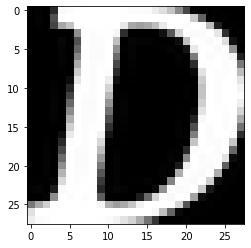

In [ ]:
obj_num = 42

y_pred = classifier.predict(X_test)
label = np.argmax(y_pred[obj_num])
if label == 0:
    result = 'A'
elif label == 1:
    result = 'B'
elif label == 2:
    result = 'C'
elif label == 3: 
    result = 'D'

print("\nPredicted letter:", result, "\n")
plt.imshow(X_test[obj_num])
plt.show()